   #       Predicting Delivery Time of Softdrink by a Vending Machine

# <img src="vendingmachine.PNG"  style = "width:800px;height:300px" />

## Table of Content

1. [Problem Statement](#ProblemStatement)<a href = '#ProblemStatement' ><br>
2. [Data Loading and Description](#section2)<a href = '#section2' ><br>
3. [Exploratory Data Analysis](#section3)<a href = '#section3' ><br>
4. [The Model - Linear Regression](#section4)<a href = '#section4' ><br>
    - 4.1 [Preparing X and y using pandas](#section401)<a href = '#section402' ><br>
    - 4.2 [Linear regression in scikit-learn](#section402)<a href = '#section402' ><br>
    - 4.3 [Interpreting Model Coefficients](#section403)<a href = '#section402' ><br>
    - 4.4 [Using the Model for Prediction](#section404)<a href = '#section402' ><br>
5. [Model evaluation](#section5)<a href = '#section5' ><br>
    - 5.1 [Model evaluation using metrics](#section501)<a href = '#section501' ><br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<a href = '#section502' ><br>
6. [Conclusion](#section6)<a href = '#section6' ><br>

<a id = 'ProblemStatement'> </a>

## 1. Problem Statement

  A soft drink bottler company is analyzing the vending machine service routes in their distribution system.They are interested in predicting the amount of time required by the route driver to service the vending machines in an outlet.
This service activity includes stocking the machine with soft drinks and minor maintenance or housekeeping. 
The industrial engineer responsible for the study has suggested that the two most important variables affecting the delivery time are  
1. The number of cases of product stocked<br>
2. The distance walked by the route driver<br>
The engineer has collected 25 observations on delivery time as shown in the further steps.

<a id = 'section2'> </a>

## 2. Data Loading and Description

The delivery dataset provides information about the time taken to bottle a soft drink using the vending machines. 
we shall try to predict the time taken by a vending machine to deliver a soft drink, 
based on the number of products stocked and the distance traversed by the route driver of the vending machine


The delivery dataset is a data frame with 25 observations on the following 3 variables.<br>
•n_prod: Number of Products stocked in a vending machine.<br>
•distance: Distance traversed by the driver mechanism of the vending machine to dispense a soft drink.<br>
•delTime: Time required to deliver(bottle) the soft drink.

__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

%matplotlib inline

#### Importing the Dataset

In [2]:
vm_delivery_data = pd.read_csv('delivery.csv')
vm_delivery_data.head()

,n_prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


<a id = 'section3'> </a>

## 3. Exploratory Data Analysis

In [3]:
vm_delivery_data.shape

(25, 3)

In [4]:
vm_delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
n_prod      25 non-null int64
distance    25 non-null int64
delTime     25 non-null float64
dtypes: float64(1), int64(2)
memory usage: 680.0 bytes


In [5]:
vm_delivery_data.describe()

,n_prod,distance,delTime
count,25.000000,25.000000,25.000000
mean,8.760000,409.280000,22.384000
std,6.881618,325.188089,15.524903
min,2.000000,36.000000,8.000000
25%,4.000000,150.000000,13.750000
50%,7.000000,330.000000,18.110000
75%,10.000000,605.000000,21.500000
max,30.000000,1460.000000,79.240000


In [6]:
vm_delivery_data.columns

Index(['n_prod', 'distance', 'delTime'], dtype='object')

#### Visualising Pairwise correlation

A scatter plot can be used to get an insight on the nature of the relationship between the variables. 
Using a scatter plot, we can visually determine whether there exists a linear association between the variables.

The scatter plot matrix of the variables - n_prod, distance and delTime is shown below

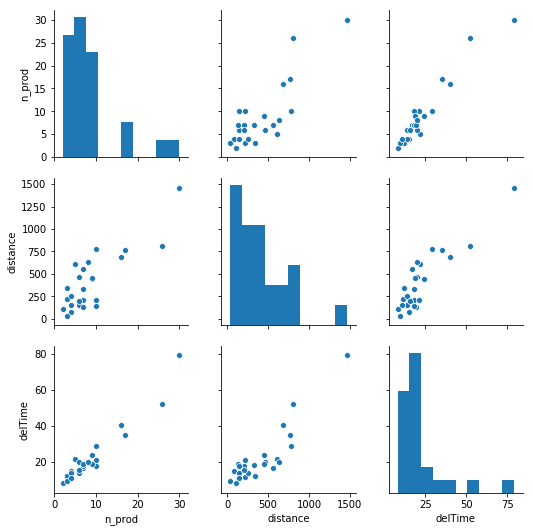

In [7]:
sns.pairplot(vm_delivery_data)

D:\DATASCIENCE\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


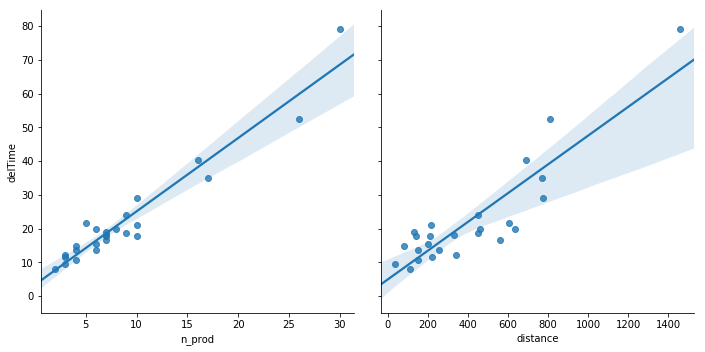

In [8]:
sns.pairplot(vm_delivery_data, x_vars=['n_prod','distance'], y_vars='delTime', size=5, aspect=1, kind='reg')

We can observe, that the scatter plot matrix for the delivery time dataset shown above suggests a __linear relationship__ among its variables – n_prod, distance and delTime.

Simple linear regression model represents a line. 
On the other hand, the multiple regression model represents a plane (in cases of two predictors) or a hyperplane (in cases of more than two predictors).

Text(0.5, 0, 'delTime')

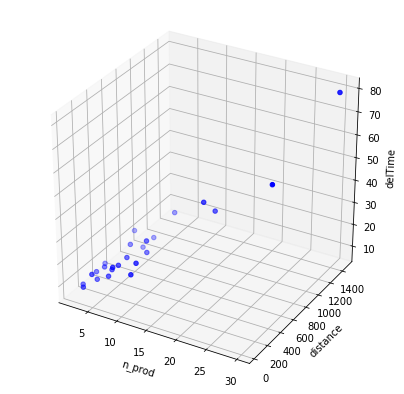

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d' )
ax.scatter(xs = vm_delivery_data["n_prod"], ys = vm_delivery_data["distance"],zs=vm_delivery_data["delTime"],c='b')
ax.set_xlabel("n_prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")



<a id = 'section4'> </a>

## 4. The Model 

To apply any machine learning algorithm on the dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the dataset
3. Prediction on the set
4. Calculating Root mean square error <br/> 
The code block given below shows how these steps are carried out:<br/>

<a id = 'section401'> </a>

### 4.1 Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(vm_delivery_data )
scaled_vm_delivery_data = scaler.transform(vm_delivery_data)

D:\DATASCIENCE\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\DATASCIENCE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
scaled_vm_df = pd.DataFrame(scaled_vm_delivery_data)
scaled_vm_df.head()

,0,1,2
0,-0.261028,0.473043,-0.374986
1,-0.854272,-0.594066,-0.715524
2,-0.854272,-0.217439,-0.680681
3,-0.705961,-1.033463,-0.493320
4,-0.409339,-0.813765,-0.567607


In [12]:
vm_delivery_data.columns = ['n_prod','distance','delTime']
vm_delivery_data.head()

,n_prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [13]:
feature_cols = ['n_prod','distance']                # create a Python list of feature names
X = vm_delivery_data[feature_cols]  

- Checking the type and shape of X.

In [14]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(25, 2)


In [15]:
y = vm_delivery_data.delTime
y.head()

0    16.68
1    11.50
2    12.03
3    14.88
4    13.75
Name: delTime, dtype: float64

- Check the type and shape of y

In [16]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(25,)


<a id = 'section402'> </a>

### 4.2 Linear regression in scikit-learn

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X = vm_delivery_data[['n_prod','distance']]
y = vm_delivery_data['delTime']
model = linreg.fit(X, y)

The co efficient of determination (R2) for the obtained best fit linear regression model can be determined as below

In [18]:
model.score(X,y)

0.9595937494832257

The best fit model obtained for predicting the delTime for the given sample dataset can be visualized as shown below

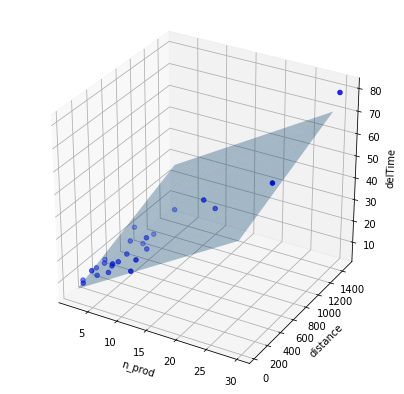

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d' )
ax.scatter(xs = vm_delivery_data["n_prod"], ys = vm_delivery_data["distance"],zs=vm_delivery_data["delTime"],c='b')
ax.set_xlabel("n_prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(vm_delivery_data["n_prod"].min(), vm_delivery_data["n_prod"].max(), 1) 
y_surf = np.arange(vm_delivery_data["distance"].min(), vm_delivery_data["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n_prod': x_surf.ravel(), 'distance': y_surf.ravel()})

#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)
#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                alpha = 0.4)

<a id = 'section403'> </a>

### 4.3 Interpreting Model Coefficients

In [20]:
print("Intercept:",linreg.intercept_ ,"\nCoefficients:",linreg.coef_)

Intercept: 2.3412311451922037 
Coefficients: [1.61590721 0.01438483]


We are __zipping__ the features to pair the feature names with the coefficients

In [21]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)  

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 2.3412311451922037
n_prod 1.6159072106092536
distance 0.01438482625554812


The best fit model to predict the delivery time based on n_prod and distance can be expressed as shown below.

   #### _y = 2.34123 + 1.61590 `*` n__prod + 0.01438 `*` distance 
   $y = \beta_0 + \beta_1x + \beta_2x$

we can infer that the number of cases stocked add to the value of delivery time 
- A "unit" increase in case is **associated with** a _"1.61590_ unit" increase in Delivery time.

<a id = 'section404'> </a>

### 4.4 Using Model for Prediction 

In [22]:
y_pred = linreg.predict(X)
print (y_pred)

[21.70808432 10.35361455 12.0797937   9.95564609 14.19439835 18.39957428
  7.15537645 16.67339513 71.8202938  19.12358708 38.09250698 21.5930409
 12.47299068 18.68246414 23.3287982  29.66292843 14.91363966 15.55137869
  7.70680652 40.88796994 20.51417893 56.00652789 23.35756786 24.4028535
 10.96258393]


<a id = 'section5'> </a>

## 5. Model Evaluation  

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>

<a id = 'section501'> </a>

### 5.1 Model Evaluation using __metrics.__


Comparison between model r-squared based on number of predictors


In [23]:
# Model1 with a single predictor - n_prod
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
features = ["n_prod"]
target = ["delTime"]
model1.fit(vm_delivery_data[features],vm_delivery_data[target])
print(model1.score(vm_delivery_data[features],vm_delivery_data[target]))

0.9304813135986856


In [24]:
# Model2 with a both the predictors - n_prod and distance 
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
features = ["n_prod","distance"]
target = ["delTime"]
model2.fit(vm_delivery_data[features],vm_delivery_data[target])
print(model2.score(vm_delivery_data[features],vm_delivery_data[target]))

0.9595937494832257


It can be observed that the R2 value for the obtained best fit linear regression model is approximately 0.9595937. 
The R2 value here indicates that approximately 95.95 % of the variability observed in the delTime of the vending machine 
can be explained by variability in the predictor variables, n_prod and distance.


<a id = 'section502'> </a>

### 5.2 Model Evaluation using Adjusted R2

In [25]:
X = vm_delivery_data[features]
y = vm_delivery_data[target]

adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print( 'The adjusted Rsquare Value is {}'.format(adjusted_rscore))

The adjusted Rsquare Value is 0.9559204539817008


<a id = 'section6'> </a>

## 6.Conclusion 

We can analyse a continuous __Target variable__ called delTime based on the __independent variables__ called n_products and distance by using Linear Regression 
Hence we can provide insights to the soft drink bottler company about the usage of the vending machine with respect to delivery time which inturn can be predicted by the above discussed variables. 